# Clean raw data

## Libraries

Data wrangling and visualization.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

pd.options.display.max_columns = 50
%matplotlib inline
plt.style.use("bmh")
sns.set()

## Import data

Query the data from Elasticsearch. Alternatively you can load the *processed_tweets.csv* file.

In [2]:
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200")

In [3]:
from elasticsearch_dsl import Search
from elasticsearch_dsl import connections

connections.create_connection(hosts=["localhost"])

s = Search(using = es, index = "tweets_sentiment")
response = s.scan()

count = 0
processed_records = []
for hit in response:
    processed_records.append(hit.to_dict())
    #print(hit.to_dict())  # be careful, it will printout every hit in your index
    count += 1

print(count)

1018


## Import csv

In [3]:
df = pd.read_csv("processed_tweets.csv", sep=",")

In [5]:
df.head()

Tweet_Id                   Datetime  \
0  1598466952309211136  2022-12-01 23:59:54+00:00   
1  1598466908008980480  2022-12-01 23:59:43+00:00   
2  1598466875947880448  2022-12-01 23:59:35+00:00   
3  1598466874303463426  2022-12-01 23:59:35+00:00   
4  1598466848319750144  2022-12-01 23:59:29+00:00   

                                                Text  Likes  Retweets  \
0  If y’all are throwing out any Balenciaga, espe...      2         0   
1  #75 live at 8pm EST on this page. So many thin...      0         0   
2  @BaileyUnspoken @RealTalkPerson @KimKardashian...      0         0   
3  @kanyewest DEMNA! Lead Designer of Balenciaga!...      0         0   
4     Kanye out here burying Balenciaga news tired 😴      0         0   

              Location  Cancel  Pedophilia  QAnon  \
0      Los Angeles, CA       0           0      0   
1             Montreal       0           0      0   
2    Riverside Estates       0           0      0   
3          Houston, TX       0           0      0   
4  Manchester, England       0           0      0   

                                        Clean_tweets  \
0  if y’all are throwing out any balenciaga espec...   
1   live at est on this page so many things to ta...   
2      but she literally only wears balenciaga if...   
3      demna lead designer of balenciaga get him out   
4     kanye out here burying balenciaga news tired 😴   

                                    Processed_tweets Sentiment  
0  y’all throwing especially size l shis size sho...  negative  
1  live est page many thing talk including climat...   neutral  
2  literally wear done something le serious could...  negative  
3                            demna lead designer get   neutral  
4                         kanye burying news tired 😴  negative

In [11]:
df.tail()

Tweet_Id                  Datetime  \
1013  1598447129051234304 2022-12-01 22:41:07+00:00   
1014  1598447117282037777 2022-12-01 22:41:05+00:00   
1015  1598447111041069057 2022-12-01 22:41:03+00:00   
1016  1598447103491313664 2022-12-01 22:41:01+00:00   
1017  1598447030443167768 2022-12-01 22:40:44+00:00   

                                                   Text  Likes  Retweets  \
1013  I just finished reading about the Balenciaga c...      5         8   
1014  @bobscartoons I suspect he's trying to make a ...      4         0   
1015  Hopefully ppl will stop wearing those Sketcher...      3         0   
1016  Fuck Balenciaga. And anyone who tries to defen...      3         0   
1017  @fierro_johny @mtttt6629 @movetact600 @DailyLo...      0         0   

       Location  Cancel  Pedophilia  QAnon  \
1013      Other       0           0      0   
1014  Greenland       0           0      0   
1015     Nunya        0           0      0   
1016      Other       0           0      0   
1017      Other       0           0      0   

                                           Clean_tweets  \
1013  i just finished reading about the balenciaga c...   
1014   i suspect hes trying to make a point and will...   
1015  hopefully ppl will stop wearing those sketcher...   
1016  fuck balenciaga and anyone who tries to defend...   
1017      i highly doubt it balenciaga will see thei...   

                                       Processed_tweets Sentiment  
1013  finished reading campaign fire couple day back...       NaN  
1014  suspect he trying make point say see told ya w...       NaN  
1015     hopefully ppl stop wearing sketcherass sneaker       NaN  
1016  fuck anyone try defend pedophiliaisnotasexualo...       NaN  
1017         highly doubt see profit decreasing ad much       NaN

In [6]:
df.isnull().sum()

Tweet_Id            0
Datetime            0
Text                0
Likes               0
Retweets            0
Location            0
Cancel              0
Pedophilia          0
QAnon               0
Clean_tweets        0
Processed_tweets    5
Sentiment           0
dtype: int64

In [7]:
df.shape

(1018, 12)

## DataFrame modifications

### Datetime

In [9]:
df["Datetime"] = pd.to_datetime(df["Datetime"], format = "%Y-%m-%dT%H:%M:%S%z")

In [10]:
df["Sentiment"] = df["Sentiment"].replace("Other",np.nan,regex = True)

In [12]:
df = df.dropna()

In [13]:
df.shape

(322, 12)

In [14]:
df.isnull().sum()

Tweet_Id            0
Datetime            0
Text                0
Likes               0
Retweets            0
Location            0
Cancel              0
Pedophilia          0
QAnon               0
Clean_tweets        0
Processed_tweets    0
Sentiment           0
dtype: int64

In [15]:
#df["Location"] = df["Location"].fillna("")

## EDA

### Show a tweet's sentiment

In [10]:
display(df[df["Sentiment"] == "positive"].head(10))
display(df[df["Sentiment"] == "neutral"].head(10))
display(df[df["Sentiment"] == "negative"].head(10))

Tweet_Id                  Datetime  \
7    1598466839293599745 2022-12-01 23:59:27+00:00   
49   1598466231606067201 2022-12-01 23:57:02+00:00   
51   1598466202539790336 2022-12-01 23:56:55+00:00   
54   1598466178921467910 2022-12-01 23:56:49+00:00   
64   1598465957651177472 2022-12-01 23:55:57+00:00   
67   1598465910771269634 2022-12-01 23:55:45+00:00   
82   1598465747319414785 2022-12-01 23:55:06+00:00   
83   1598465689748000768 2022-12-01 23:54:53+00:00   
88   1598465453810225154 2022-12-01 23:53:56+00:00   
172  1598463664012800002 2022-12-01 23:46:50+00:00   

                                                  Text  Likes  Retweets  \
7    @kanyewest We love Demna. He's not Balenciaga ...      0         0   
49   @samanthamarika1 Apple and Balenciaga are prob...      0         0   
51   @CitizenFreePres @ParleUSA Interesting. Just v...      1         0   
54   @BetteMidler I love your music, your charisma ...      0         0   
64   @MikhailaFuller Alexis Hellmer, probably one o...      0         0   
67   @TheBabylonBee Of course Baal responds before ...      1         0   
82        @barnes_law Whilst wearing Balenciaga. Nice.      0         0   
83   There has been new developments in the atelier...      0         0   
88   So we’ve finally agreed to bin off Balenciaga?...      0         0   
172  Hey Balenciaga, great replacement for your spo...      0         0   

            Location  Cancel  Pedophilia  QAnon  \
7              Other       0           0      0   
49             Other       0           0      0   
51       Clown world       0           0      0   
54             Other       0           0      0   
64       Los Angeles       0           0      0   
67             Other       0           0      0   
82    Australia, USA       0           0      0   
83             Other       0           0      0   
88   London, England       0           0      0   
172            Other       0           0      0   

                                          Clean_tweets  \
7                 we love demna hes not balenciaga ceo   
49    apple and balenciaga are probably so happy ri...   
51     interesting just viue signaling because bale...   
54    i love your music your charisma and your acti...   
64    alexis hellmer probably one of the finest lat...   
67    of course baal responds before balenciaga 😂 k...   
82                      whilst wearing balenciaga nice   
83   there has been new developments in the atelier...   
88   so we’ve finally agreed to bin off balenciaga ...   
172  hey balenciaga great replacement for your spok...   

                                      Processed_tweets Sentiment  
7                                    love demna he ceo  positive  
49                          apple probably happy right  positive  
51            interesting viue signaling already money  positive  
54   love music charisma acting style bette please ...  positive  
64   alexis hellmer probably one finest latinist am...  positive  
67         course baal responds 😂 keep good work bee 👍  positive  
82                                 whilst wearing nice  positive  
83   new development atelier could exciting thing c...  positive  
88         we’ve finally agreed bin time tetri trainer  positive  
172  hey great replacement spokesperson kimkardashi...  positive

Tweet_Id                  Datetime  \
1   1598466908008980480 2022-12-01 23:59:43+00:00   
3   1598466874303463426 2022-12-01 23:59:35+00:00   
5   1598466846080262144 2022-12-01 23:59:28+00:00   
8   1598466829797687298 2022-12-01 23:59:24+00:00   
9   1598466786244317184 2022-12-01 23:59:14+00:00   
10  1598466770121396224 2022-12-01 23:59:10+00:00   
12  1598466699233484801 2022-12-01 23:58:53+00:00   
13  1598466697220227072 2022-12-01 23:58:53+00:00   
15  1598466666828292098 2022-12-01 23:58:46+00:00   
19  1598466586826149888 2022-12-01 23:58:27+00:00   

                                                 Text  Likes  Retweets  \
1   #75 live at 8pm EST on this page. So many thin...      0         0   
3   @kanyewest DEMNA! Lead Designer of Balenciaga!...      0         0   
5   Thank God I didn’t end up buying them balencia...      0         0   
8       @vikare06 Looks like a balenciaga photo shoot      2         0   
9   @DestinyVaughn @M4D3R0 @ksenijapavlovic @Mikha...      0         0   
10  @nyetengale @born2shinez Aren’t these Balencia...      0         0   
12  after #balenciaga we need to bring attention t...      0         0   
13  @_AlvinChristian @asv141 @balenciaga hire this...      2         0   
15  @jackantonoff #Balenciaga distractions. https:...      0         0   
19  @DonaldJTrumpJr I’m sure a lot more people are...      0         0   

                     Location  Cancel  Pedophilia  QAnon  \
1                    Montreal       0           0      0   
3                 Houston, TX       0           0      0   
5   Sydney / Nairobi / Harare       0           0      0   
8                  Hyde Park        0           0      0   
9    New York, NY / Manahatta       0           0      0   
10                      Other       0           0      0   
12               Chinafornia        0           0      0   
13                      Other       0           0      0   
15                      Other       0           0      0   
19                      Other       0           0      0   

                                         Clean_tweets  \
1    live at est on this page so many things to ta...   
3       demna lead designer of balenciaga get him out   
5   thank god i didn’t end up buying them balencia...   
8                 looks like a balenciaga photo shoot   
9                                the photos are above   
10                     aren’t these balenciaga models   
12  after balenciaga we need to bring attention to...   
13                                      hire this man   
15         balenciaga distractions httpstconbedpzfkqa   
19   i’m sure a lot more people are eating goya pr...   

                                     Processed_tweets Sentiment  
1   live est page many thing talk including climat...   neutral  
3                             demna lead designer get   neutral  
5       thank god didn’t end buying sneaker last year   neutral  
8                               look like photo shoot   neutral  
9                                               photo   neutral  
10                                       aren’t model   neutral  
12                     need bring attention hollywood   neutral  
13                                           hire man   neutral  
15                     distraction httpstconbedpzfkqa   neutral  
19    i’m sure lot people eating goya product wearing   neutral

Tweet_Id                  Datetime  \
0   1598466952309211136 2022-12-01 23:59:54+00:00   
2   1598466875947880448 2022-12-01 23:59:35+00:00   
4   1598466848319750144 2022-12-01 23:59:29+00:00   
6   1598466840992579584 2022-12-01 23:59:27+00:00   
11  1598466707957374976 2022-12-01 23:58:55+00:00   
14  1598466669218861057 2022-12-01 23:58:46+00:00   
16  1598466648562077696 2022-12-01 23:58:41+00:00   
17  1598466632380485632 2022-12-01 23:58:37+00:00   
18  1598466588386156546 2022-12-01 23:58:27+00:00   
20  1598466567372931073 2022-12-01 23:58:22+00:00   

                                                 Text  Likes  Retweets  \
0   If y’all are throwing out any Balenciaga, espe...      2         0   
2   @BaileyUnspoken @RealTalkPerson @KimKardashian...      0         0   
4      Kanye out here burying Balenciaga news tired 😴      0         0   
6   @mmpadellan With the drama at Balenciaga and D...      3         0   
11  I could careless about Kanye and his prerogati...     34         1   
14  Kim K standing behind Balenciaga absolutely SU...    263         7   
16  @prime98704851 @Woundedsheepdog @_BarringtonII...      0         0   
17  Balenciaga. Terrible choice of advertisements ...      1         0   
18  "Ugh, it's so good." Seriously, even before yo...      1         0   
20  Grace Tame, happy to bash the LNP but dead sil...      1         0   

                      Location  Cancel  Pedophilia  QAnon  \
0              Los Angeles, CA       0           0      0   
2            Riverside Estates       0           0      0   
4          Manchester, England       0           0      0   
6                        Other       0           1      0   
11                       Other       0           0      0   
14                       Other       0           0      0   
16                  Maine, USA       0           0      0   
17                       Other       0           0      0   
18                       Other       0           0      0   
20  Under a surveillance state       0           0      0   

                                         Clean_tweets  \
0   if y’all are throwing out any balenciaga espec...   
2       but she literally only wears balenciaga if...   
4      kanye out here burying balenciaga news tired 😴   
6    with the drama at balenciaga and democrats ma...   
11  i could careless about kanye and his prerogati...   
14  kim k standing behind balenciaga absolutely su...   
16     i didn’t say you did  was just asking how t...   
17  balenciaga terrible choice of adveisements and...   
18  ugh its so good seriously even before you laye...   
20  grace tame happy to bash the lnp but dead sile...   

                                     Processed_tweets Sentiment  
0   y’all throwing especially size l shis size sho...  negative  
2   literally wear done something le serious could...  negative  
4                          kanye burying news tired 😴  negative  
6   drama democrat mad elon musk removing pedo sig...  negative  
11  could careless kanye prerogative you’re upset ...  negative  
14  kim k standing behind absolutely suck awful mo...  negative  
16  didn’t say asking cancel balenciaga b 🤷‍♀️ wor...  negative  
17          terrible choice adveisements i’m httpstco  negative  
18  ugh good seriously even layer satanic referenc...  negative  
20  grace tame happy bash lnp dead silent shocking...  negative

In [15]:
sentiment_counts = df.groupby(["Sentiment"]).size()
print(sentiment_counts)

Sentiment
negative    151
neutral     153
positive     18
dtype: int64


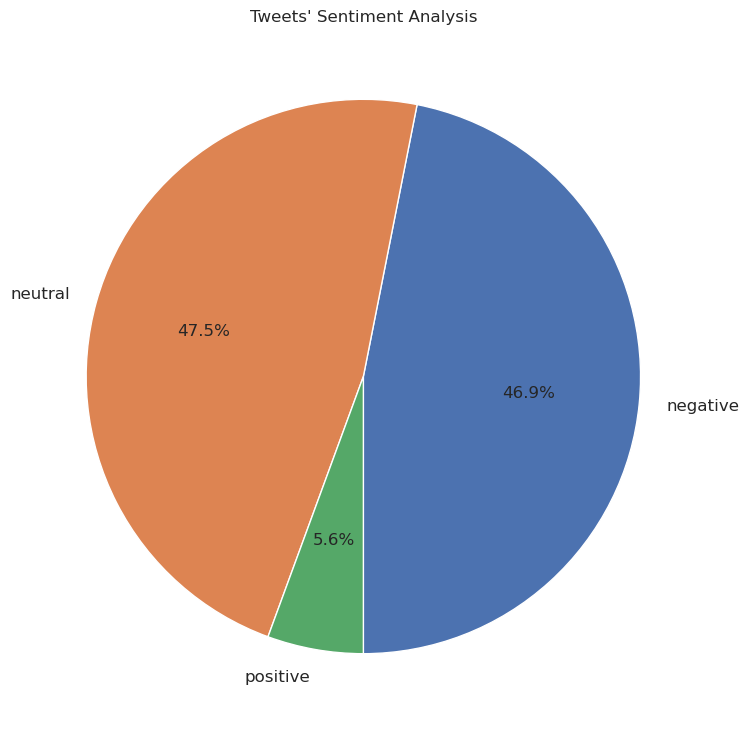

In [16]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Tweets' Sentiment Analysis")
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.savefig("Tweets_Sentiment_pie.jpg")

### Show a handles' sentiment

In [15]:
#display(df[df["Cancel"]==1][["Cancel", "Sentiment"]].groupby("Cancel").agg([np.mean, np.max, np.min, np.median]))
#display(df[df["Pedophilia"]==1][["Pedophilia", "Sentiment"]].groupby("Pedophilia").agg([np.mean, np.max, np.min, np.median]))
#display(df[df["QAnon"]==1][["QAnon", "Sentiment"]].groupby("QAnon").agg([np.mean, np.max, np.min, np.median]))

In [17]:
sentiment_cancel_counts = df.groupby(["Cancel","Sentiment"]).size()
print(sentiment_cancel_counts)

Cancel  Sentiment
0       negative     150
        neutral      152
        positive      18
1       negative       1
        neutral        1
dtype: int64


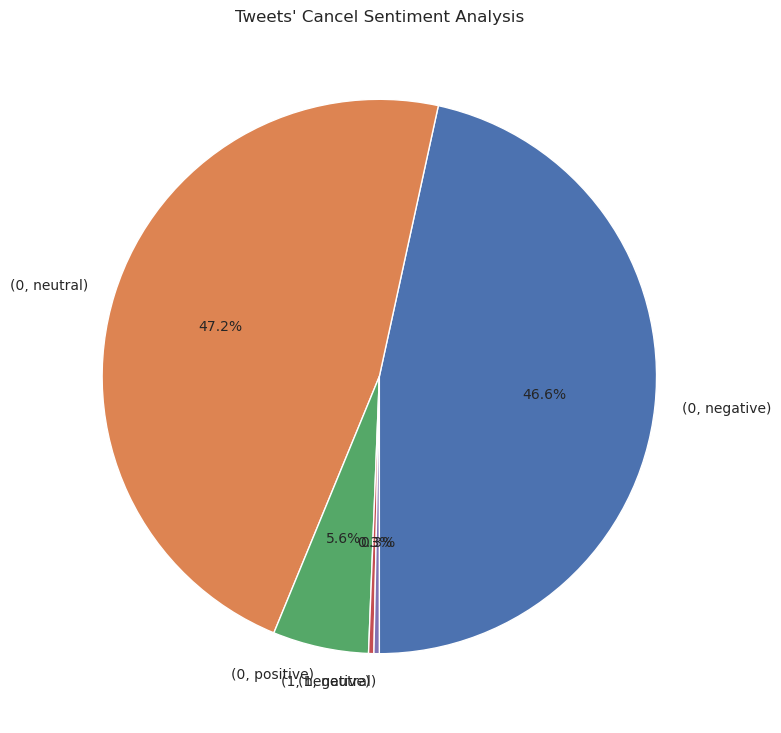

In [18]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Tweets' Cancel Sentiment Analysis")
sentiment_cancel_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize= 10, label="")
plt.savefig("Tweets_Cancel_Sentiment_pie.jpg")

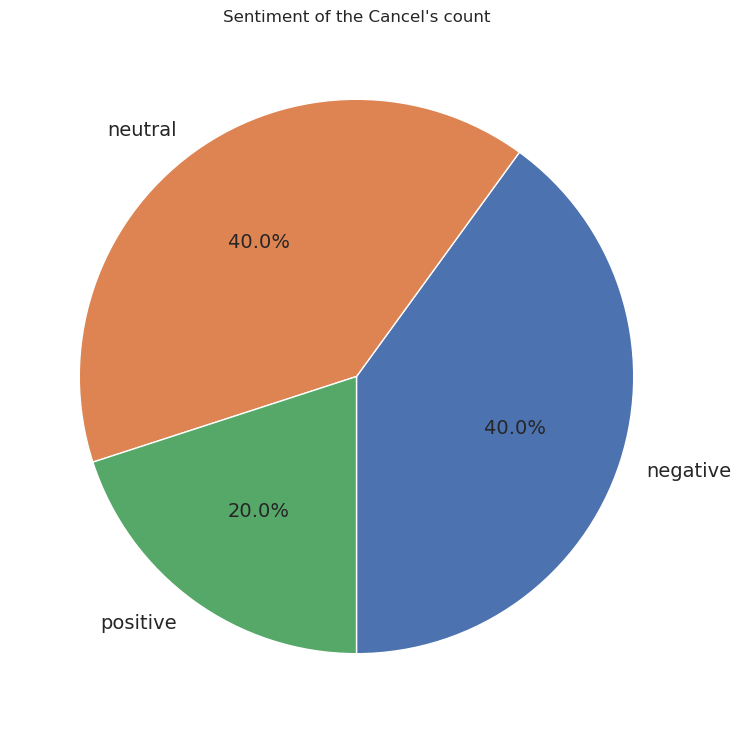

In [19]:
cancel = df[["Cancel", "Sentiment"]].groupby(["Sentiment","Cancel"]).count()
cancel = pd.DataFrame(cancel)
cancel = cancel.groupby(["Sentiment"]).size()
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Sentiment of the Cancel's count")
cancel.plot.pie(ax=ax, autopct="%1.1f%%", startangle=  270, fontsize = 14, label= "")
plt.savefig("cancelCount_Sentiment_pie.jpg")

In [20]:
sentiment_pedophilia_counts = df.groupby(["Pedophilia","Sentiment"]).size()
print(sentiment_pedophilia_counts)

Pedophilia  Sentiment
0           negative     134
            neutral      153
            positive      18
1           negative      17
dtype: int64


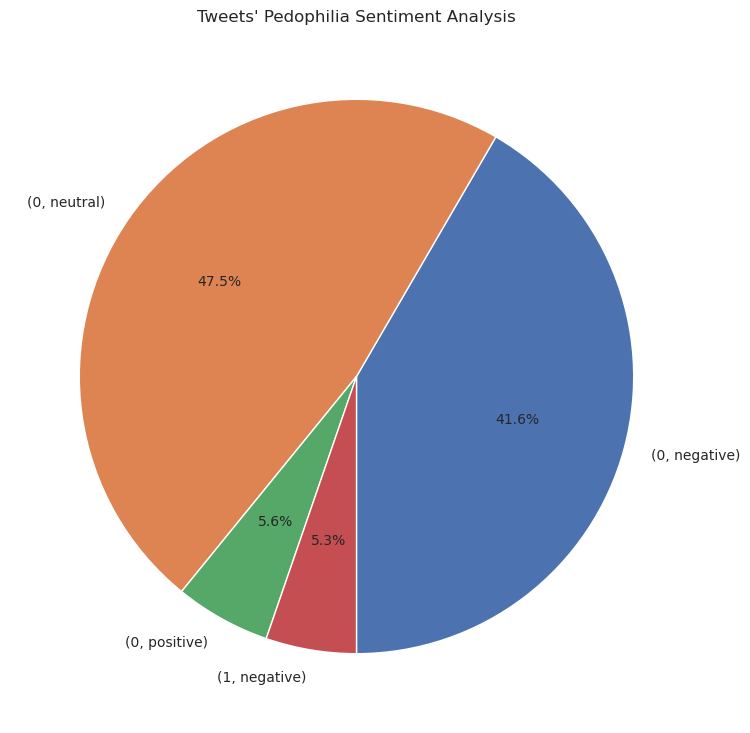

In [21]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Tweets' Pedophilia Sentiment Analysis")
sentiment_pedophilia_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize= 10, label="")
plt.savefig("Tweets_Pedophilia_Sentiment_pie.jpg")

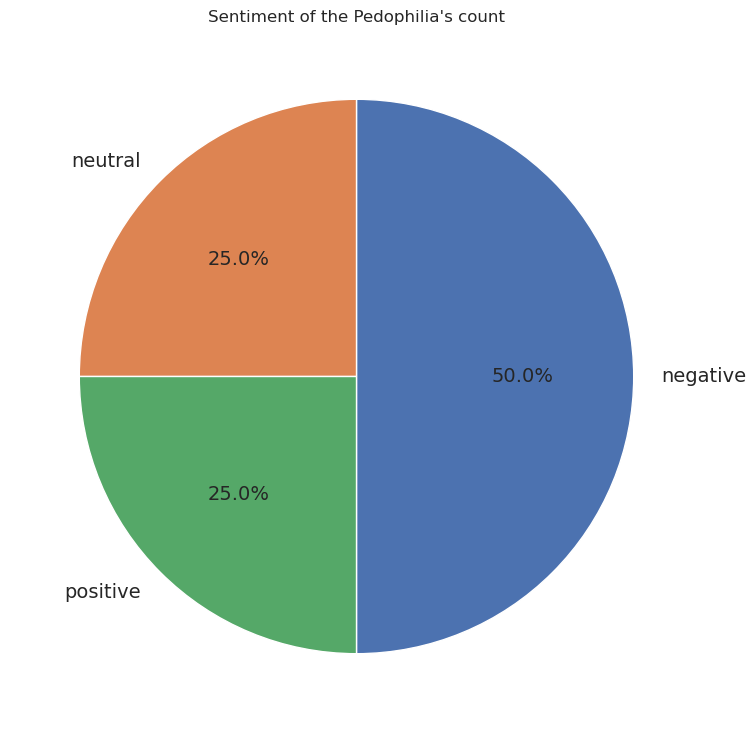

In [22]:
pedophilia = df[["Pedophilia", "Sentiment"]].groupby(["Sentiment","Pedophilia"]).count()
pedophilia = pd.DataFrame(pedophilia)
pedophilia = pedophilia.groupby(["Sentiment"]).size()
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Sentiment of the Pedophilia's count")
pedophilia.plot.pie(ax=ax, autopct="%1.1f%%", startangle=  270, fontsize = 14, label= "")
plt.savefig("pedophiliaCount_Sentiment_pie.jpg")

In [23]:
sentiment_QAnon_counts = df.groupby(["QAnon","Sentiment"]).size()
print(sentiment_QAnon_counts)

QAnon  Sentiment
0      negative     151
       neutral      152
       positive      18
1      neutral        1
dtype: int64


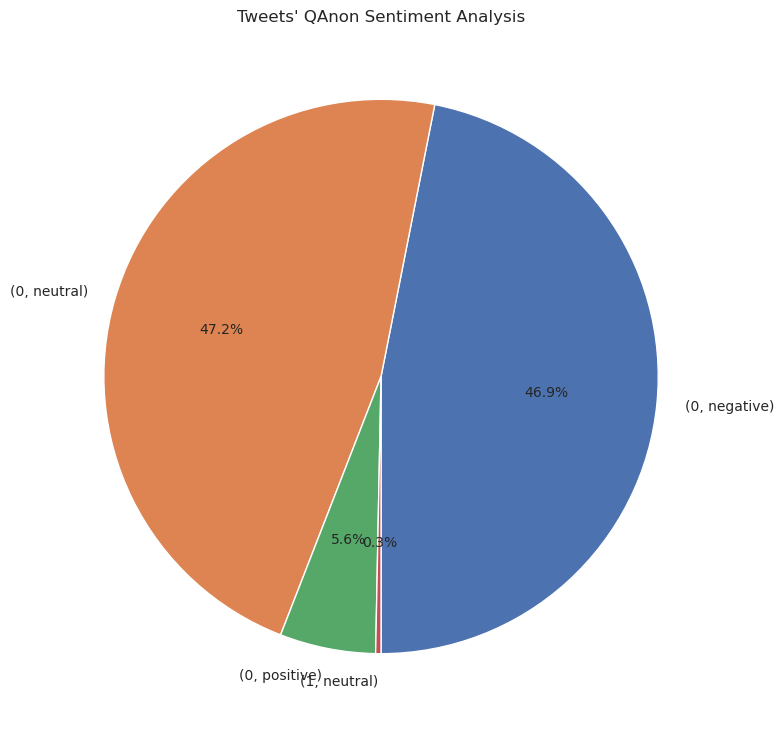

In [24]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Tweets' QAnon Sentiment Analysis")
sentiment_QAnon_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize= 10, label="")
plt.savefig("Tweets_QAnon_Sentiment_pie.jpg")

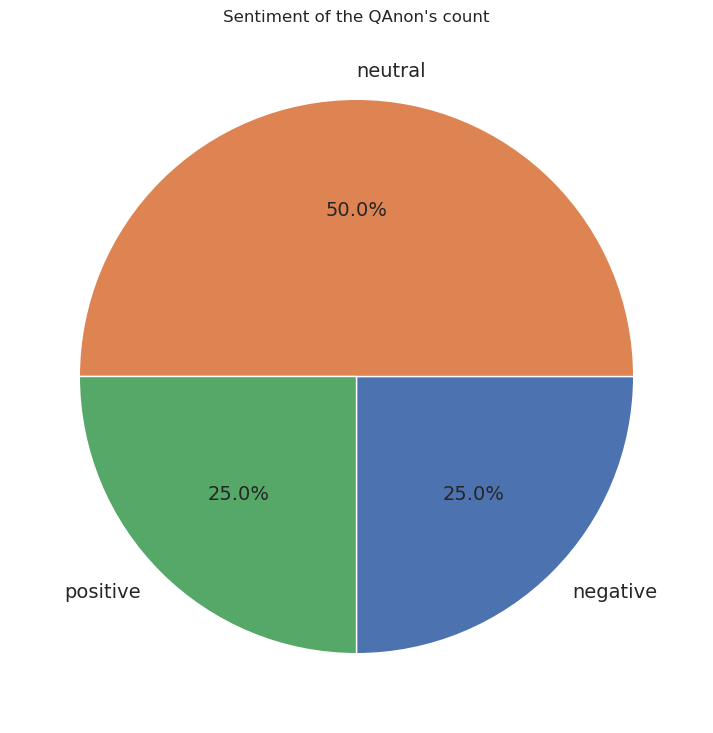

In [25]:
qanon = df[["QAnon", "Sentiment"]].groupby(["Sentiment","QAnon"]).count()
qanon = pd.DataFrame(qanon)
qanon = qanon.groupby(["Sentiment"]).size()
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Sentiment of the QAnon's count")
qanon.plot.pie(ax=ax, autopct="%1.1f%%", startangle=  270, fontsize = 14, label= "")
plt.savefig("qanonCount_Sentiment_pie.jpg")

### Show likes & retweets sentiment

#### Likes

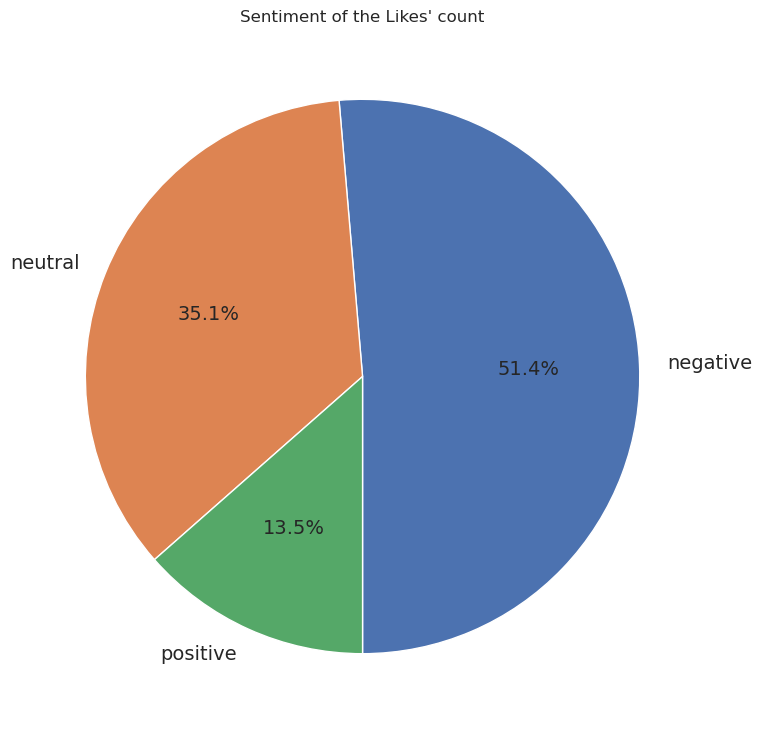

In [26]:
likes = df[["Likes", "Sentiment"]].groupby(["Sentiment","Likes"]).count()
likes = pd.DataFrame(likes)
likes = likes.groupby(["Sentiment"]).size()
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Sentiment of the Likes' count")
likes.plot.pie(ax=ax, autopct="%1.1f%%", startangle=  270, fontsize = 14, label= "")
plt.savefig("likesCount_Sentiment_pie.jpg")

In [27]:
sentiment_likes_counts = df[["Likes","Sentiment"]].groupby(["Sentiment","Likes"]).size()
print(sentiment_likes_counts)

Sentiment  Likes
negative   0        76
           1        36
           2        13
           3         6
           4         2
           5         2
           6         2
           9         1
           12        2
           14        2
           15        1
           18        1
           23        1
           32        1
           34        1
           219       1
           263       1
           268       1
           1184      1
neutral    0        91
           1        32
           2        10
           3         6
           4         4
           6         2
           7         1
           26        1
           37        1
           43        2
           106       1
           379       1
           20849     1
positive   0        12
           1         3
           6         1
           8         1
           19        1
dtype: int64


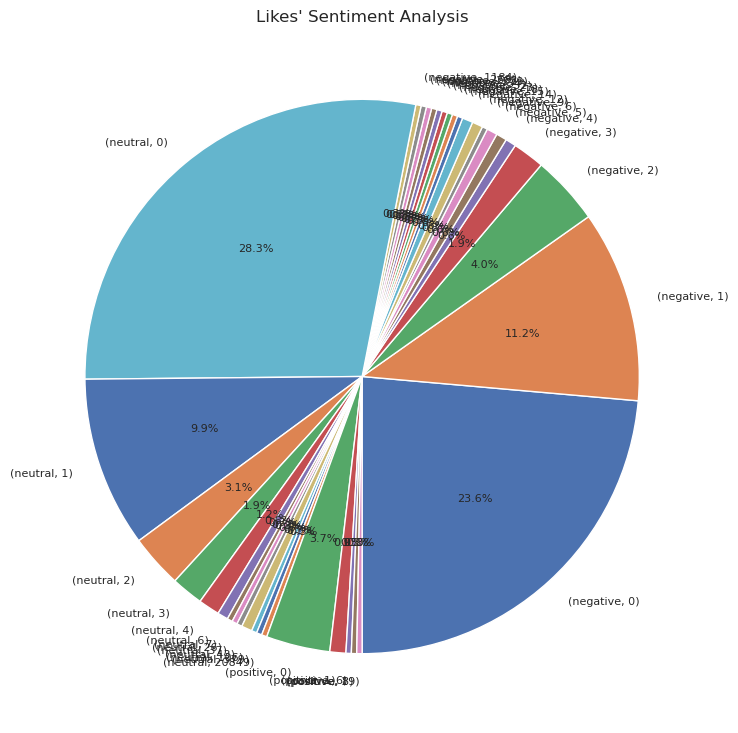

In [28]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Likes' Sentiment Analysis")
sentiment_likes_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=8, label= "")
plt.savefig("Likes_Sentiment_pie.jpg")

#### Retweets

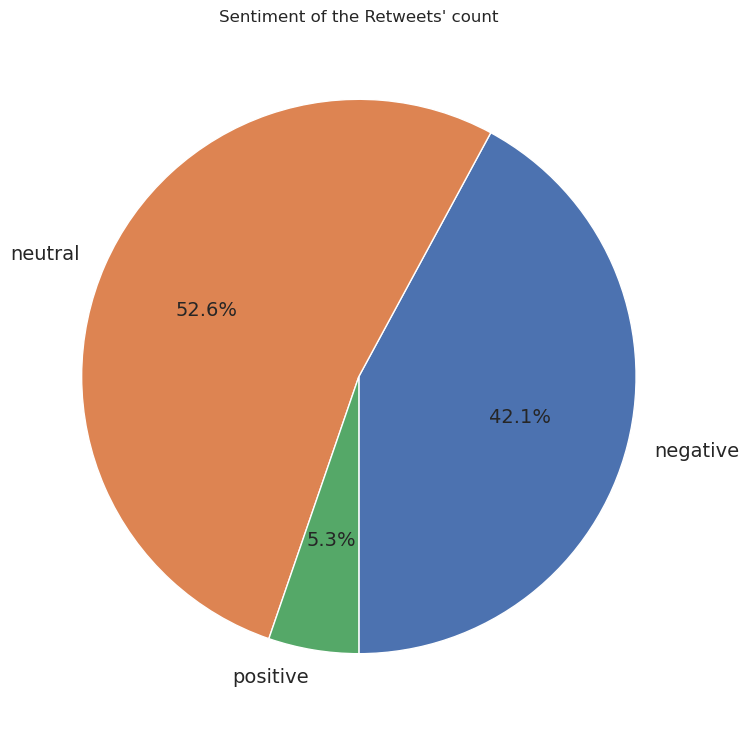

In [29]:
retweets = df[["Retweets", "Sentiment"]].groupby(["Sentiment","Retweets"]).count()
retweets = pd.DataFrame(retweets)
retweets = retweets.groupby(["Sentiment"]).size()
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Sentiment of the Retweets' count")
retweets.plot.pie(ax=ax, autopct="%1.1f%%", startangle=  270, fontsize = 14, label= "")
plt.savefig("retweetsCount_Sentiment_pie.jpg")

In [30]:
sentiment_rt_counts = df[["Retweets","Sentiment"]].groupby(["Sentiment","Retweets"]).size()
print(sentiment_rt_counts)

Sentiment  Retweets
negative   0           129
           1            11
           2             3
           3             4
           7             1
           68            1
           97            1
           374           1
neutral    0           137
           1             6
           2             2
           3             2
           7             1
           21            1
           33            1
           85            1
           145           1
           4107          1
positive   0            18
dtype: int64


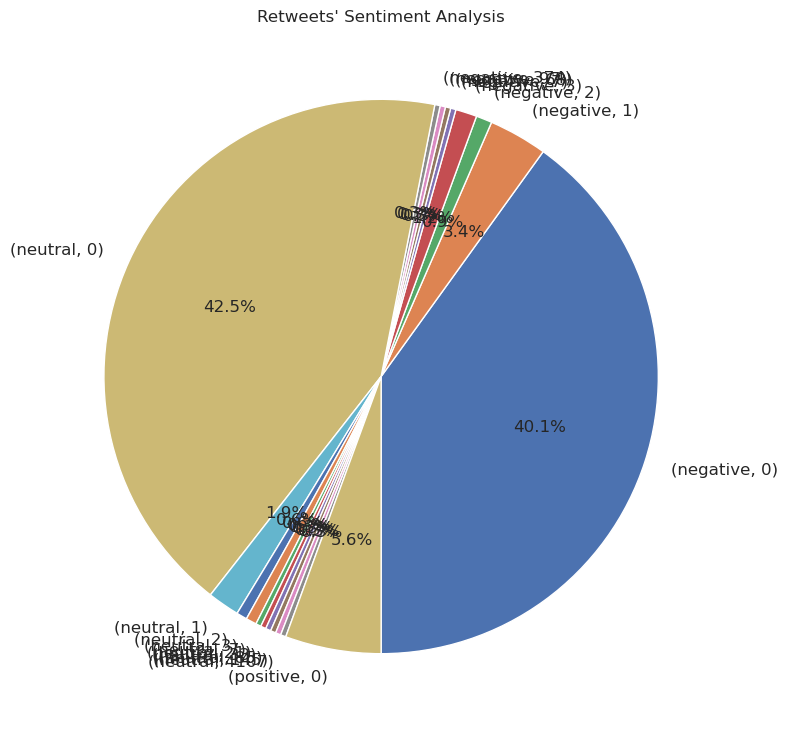

In [31]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = plt.subplot(111)
plt.title("Retweets' Sentiment Analysis")
sentiment_rt_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize = 12, label= "")
plt.savefig("Retweets_Sentiment_pie.jpg")

### Wordclouds

#### Processed tweets

In [42]:
#df.head()

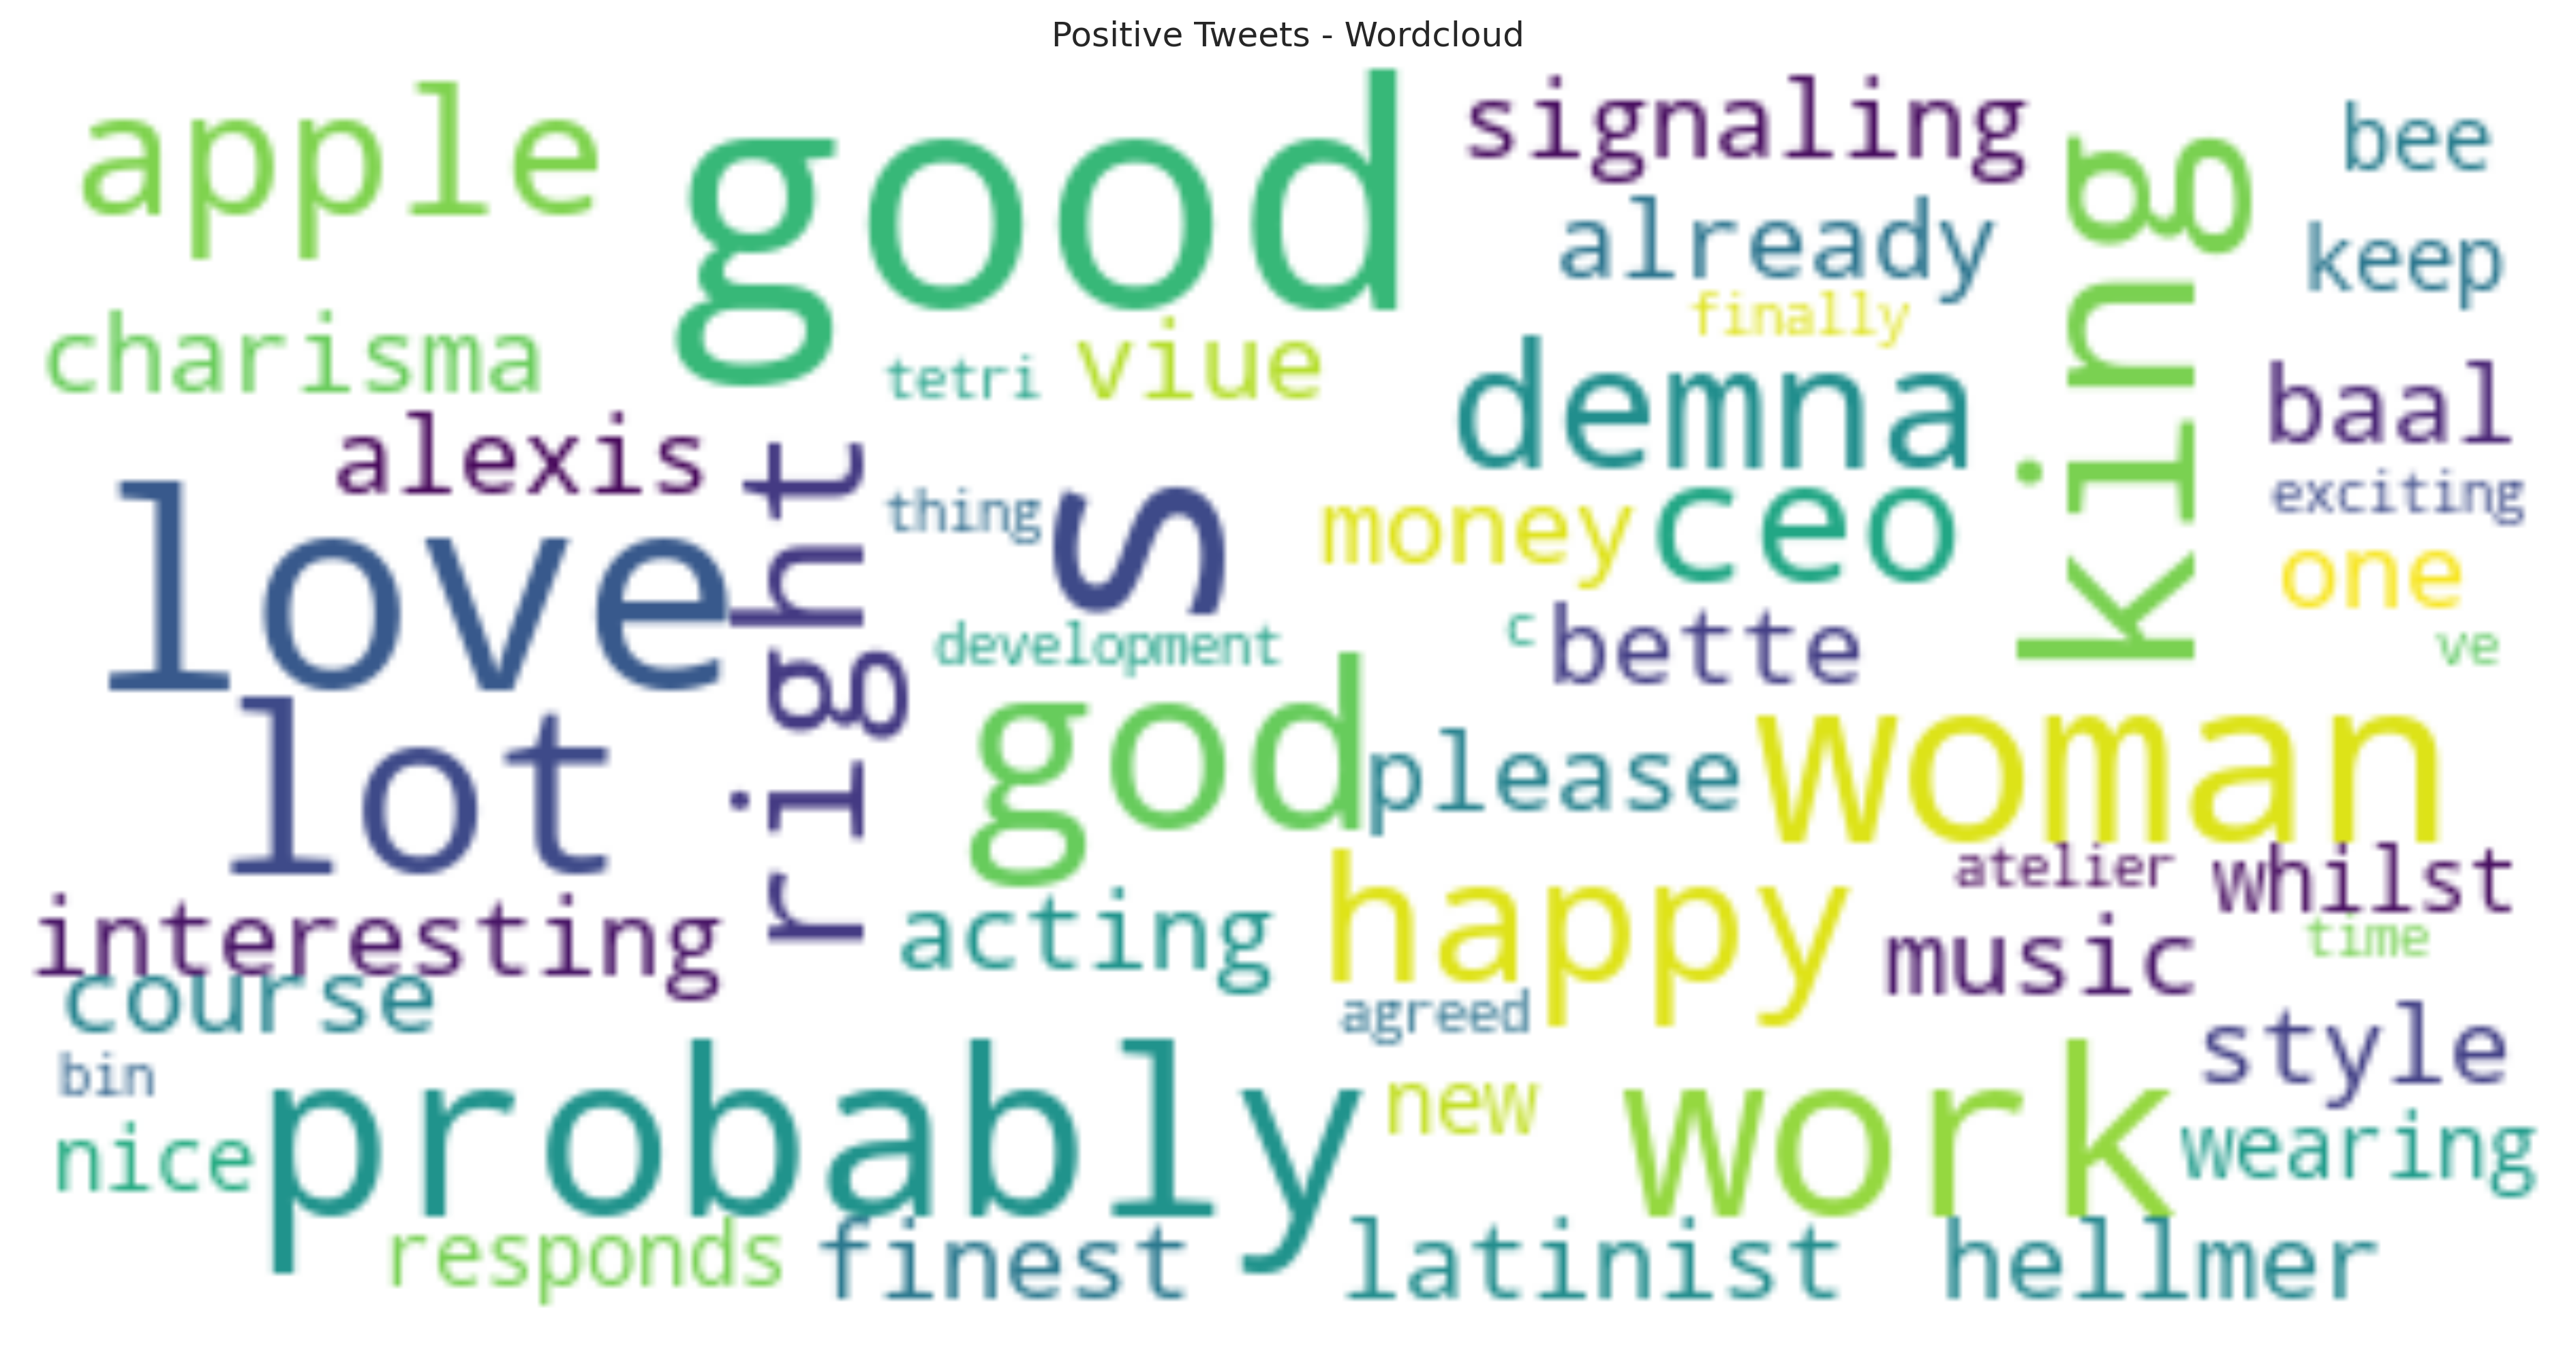

<Figure size 640x480 with 0 Axes>

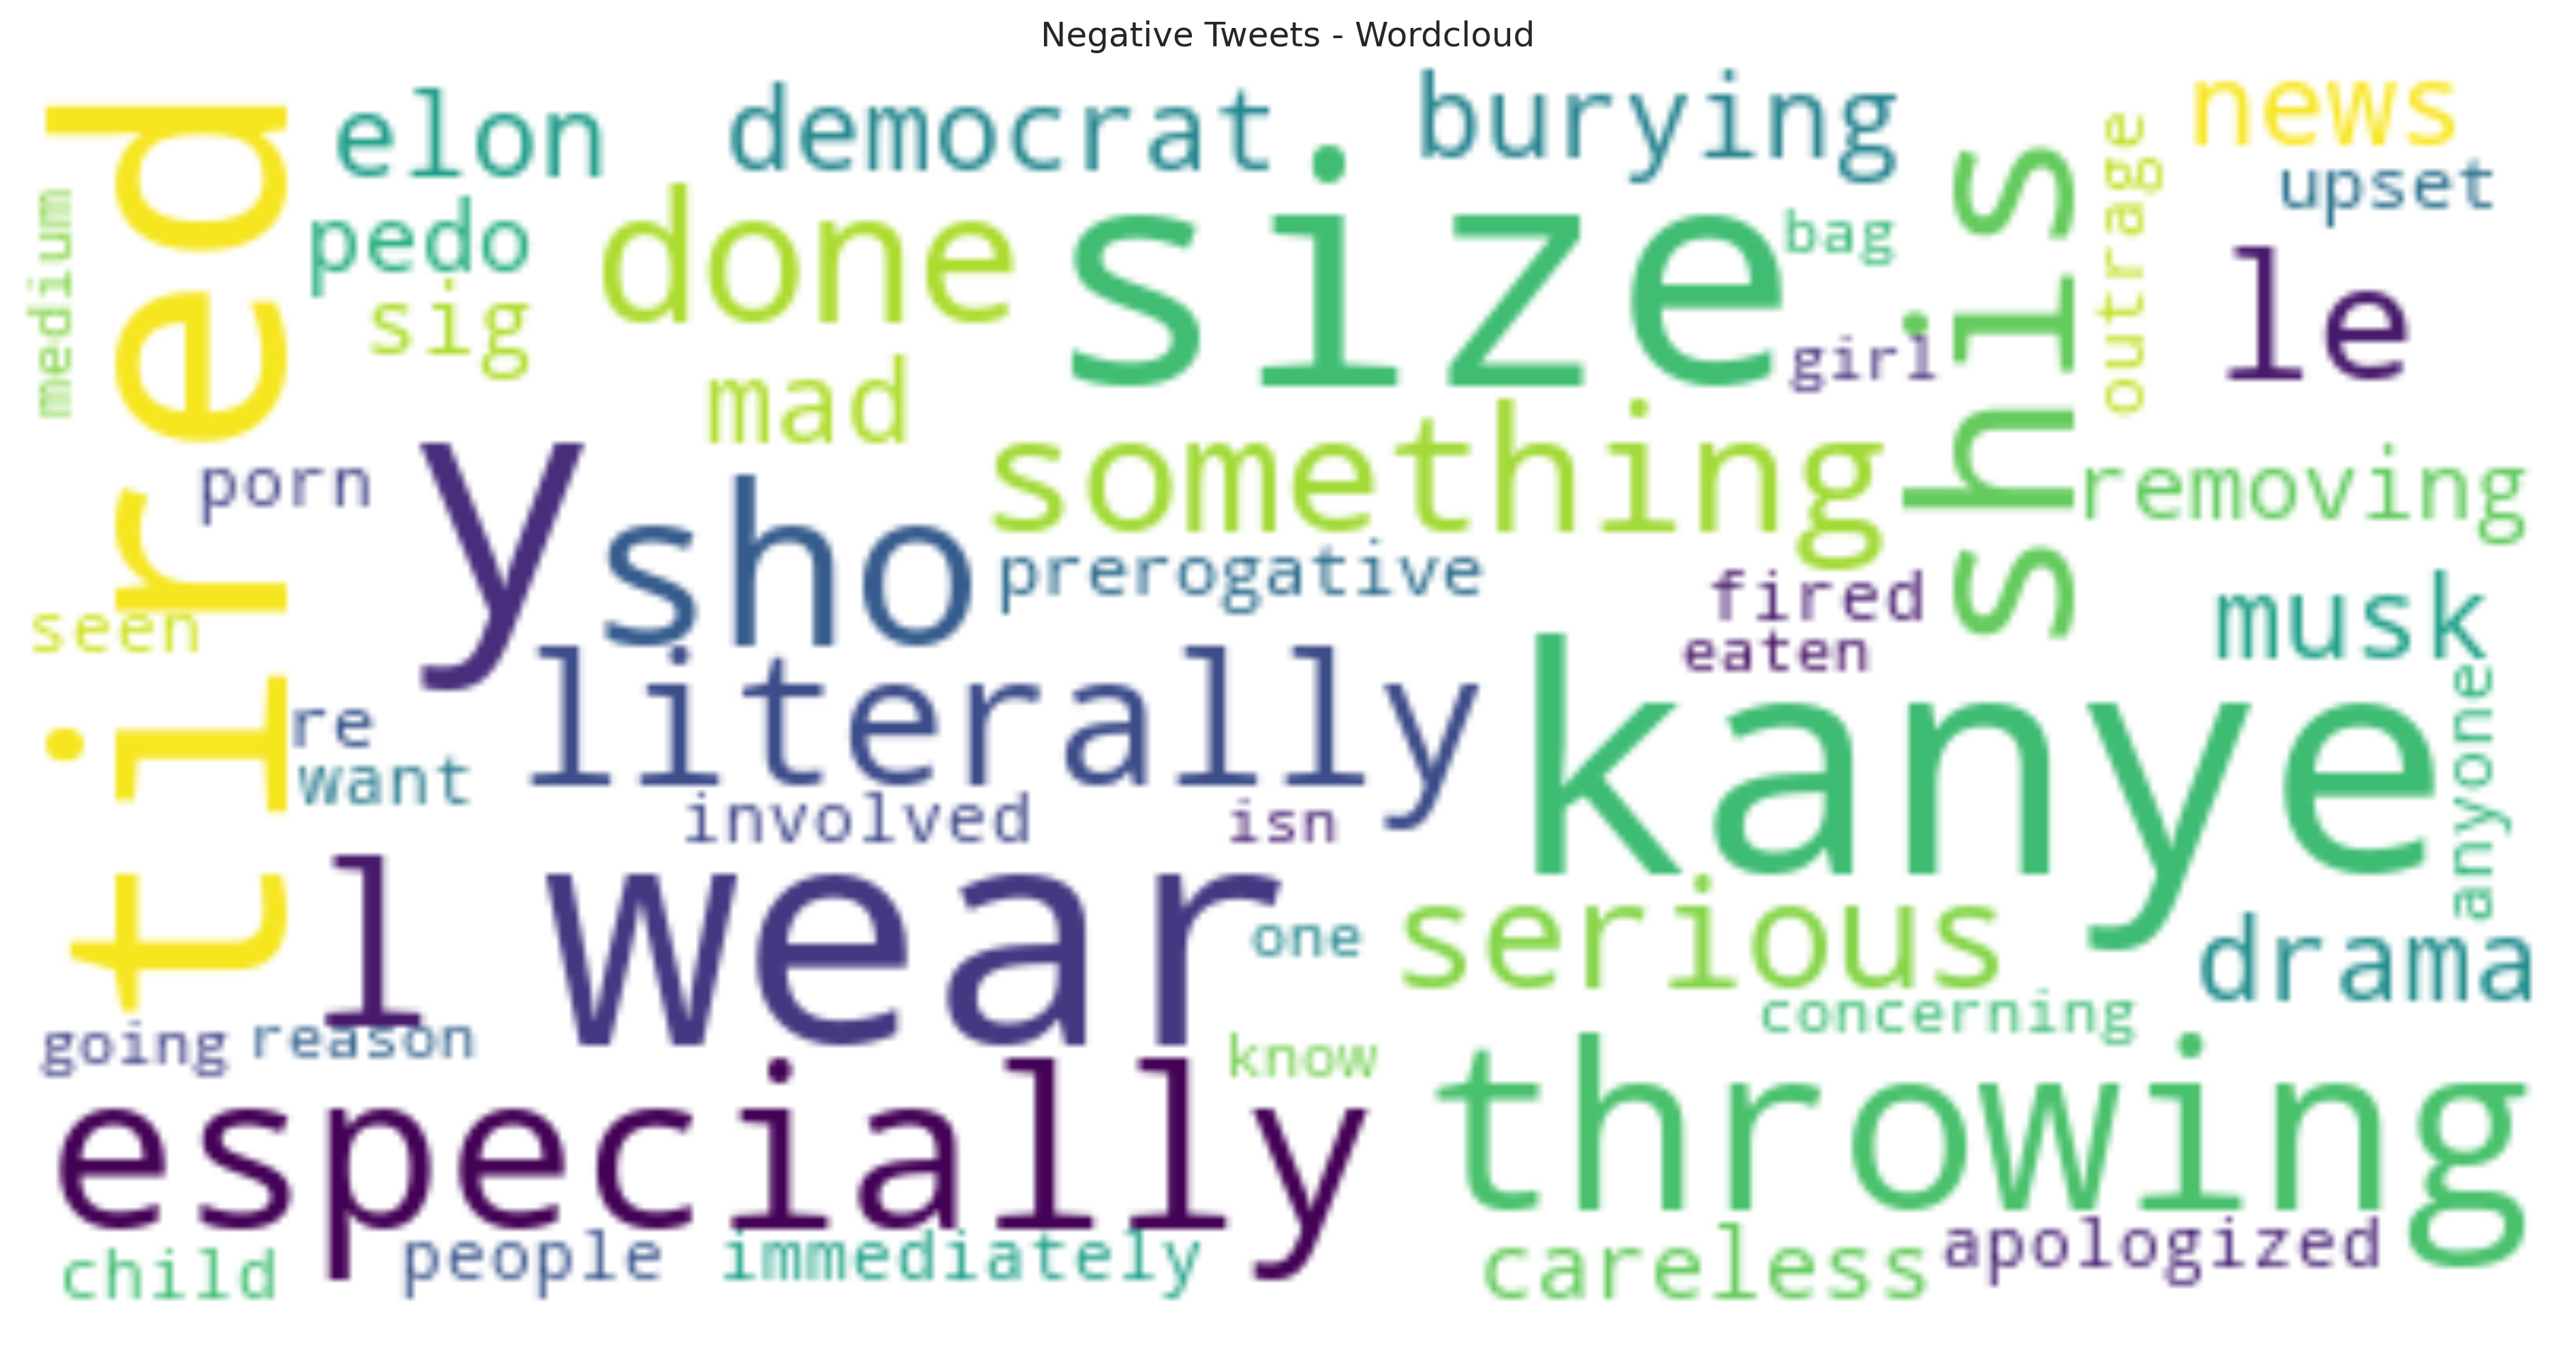

<Figure size 640x480 with 0 Axes>

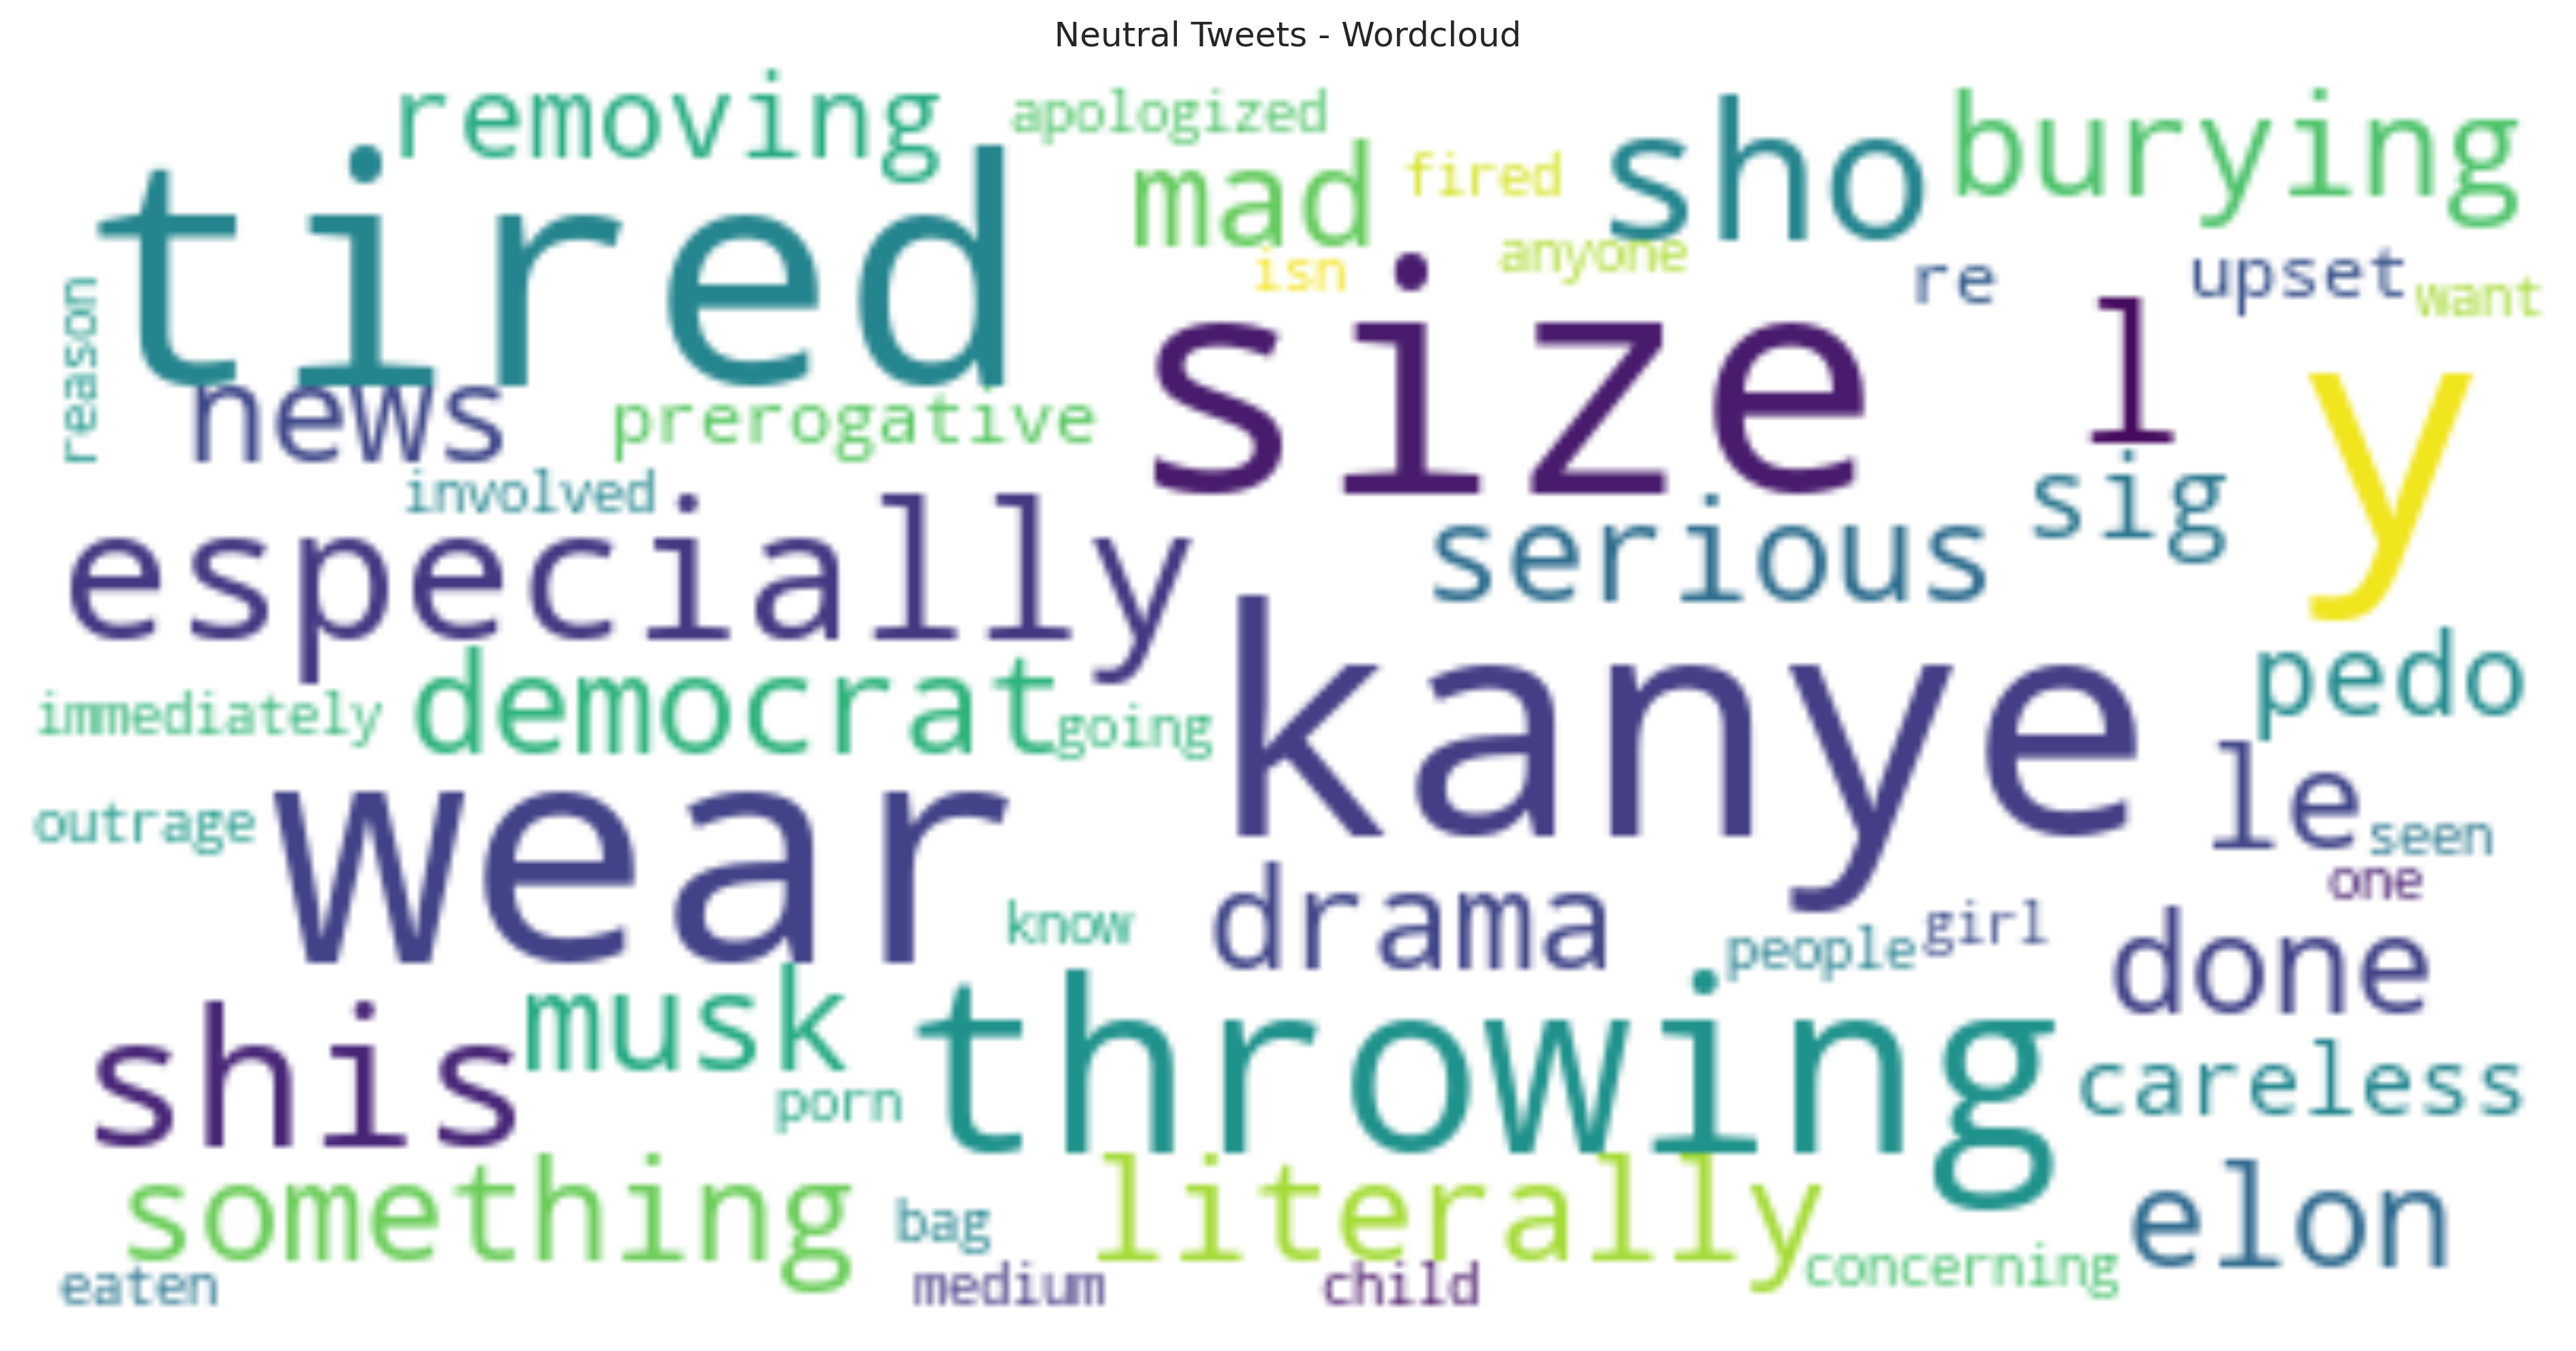

<Figure size 640x480 with 0 Axes>

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df["Processed_tweets"][df["Sentiment"] == "positive"]
stop_words = ["https", "co", "httpstco",  "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize = (16, 12), dpi = 300)
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("positive_wordcloud.png")
 
# Wordcloud with negative tweets
negative_tweets = df["Processed_tweets"][df["Sentiment"] == 'negative']
stop_words = ["https", "co", "httpstco",  "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure(figsize = (16, 12), dpi = 300)
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("negative_wordcloud.png")
 

# Wordcloud with neutral tweets
neutral_tweets = df["Processed_tweets"][df["Sentiment"] == 'neutral']
stop_words = ["https", "co", "httpstco", "RT"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure(figsize = (16, 12), dpi = 300)
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("neutral_wordcloud.png")

#### Hastags

In [44]:
HT_positive = []
HT_negative = []
HT_neutral = []

In [45]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [46]:
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df["Text"][df["Sentiment"] == "positive"])
HT_negative = hashtag_extract(df["Text"][df["Sentiment"] == "negative"])
HT_neutral = hashtag_extract(df["Text"][df["Sentiment"] == "neutral"])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

In [47]:
HT_positive 

['balenciaga', 'kimkardashian', 'Balenciaga', 'rnagraphy', 'Balenciaga']

In [48]:
HT_negative

['Lotta',
 'LottaVolkova',
 'BalenciagaGate',
 'Balenciaga',
 'Balenciaga',
 'Balenciaga',
 'Balenciagapedos',
 'balenciaga',
 'BalenciagaGate',
 'BalenciagaPedofilia',
 'Balenciaga',
 'NicoleKidman',
 'SilenceIsDeafening',
 'Balenciaga',
 'loveiscorrection',
 'Balenciaga',
 'childtrafficking',
 'whatsinthebag',
 'savethechildren',
 'WorldCup',
 'cancelbalenciaga',
 'burnbalenciaga',
 'instagram',
 'Balenciaga',
 'KimKardashian',
 'BalenciagaGate',
 'BalenciagaGate',
 'Balenciaga',
 'balenciaga',
 'KanyeWest',
 'ye',
 'Balenciaga',
 'Balenciaga',
 'Balenciaga',
 'Nike',
 'Balenciaga',
 'AlBUCKquerque',
 'balenciaga',
 'thanksgiving',
 'slavery',
 'BALENCIAGA',
 'hitler',
 'america',
 'natives',
 'blacks',
 'kanye',
 'boycottadidas',
 'BalenciagaGate',
 'Balenciaga',
 'Balenciaga',
 'Balenciaga',
 'BalenciagaGate',
 'cancelNicolekidman',
 'Balenciaga',
 'mikevick',
 'dogs']

In [49]:
HT_neutral

['75',
 'balenciaga',
 'hollywood',
 'Balenciaga',
 'fakenews',
 'LottaVolkova',
 'Pinault',
 'Kering',
 'Balenciaga',
 'BalenciagaGate',
 'Balenciaga',
 'Vetements',
 'DemnaGvasalia',
 'Balenciaga',
 'Balenciaga',
 'ShineALight',
 'lightothedarkness',
 'FashionGate',
 'BalenciagaGate',
 'Balenciaga',
 'truth',
 'Balenciaga',
 'moneymatters',
 'Balenciaga',
 'ye',
 'balenciaga',
 'BALENCIAGA',
 'Balenciaga',
 'Balenciaga',
 'Balenciaga',
 'BalenciagaAdidas',
 'childexploitation',
 'Balenciaga',
 'BreakingNews',
 'conservative',
 'ConservativeNews',
 'trump',
 'republican',
 'BalenciagaGate',
 'Balenciaga',
 'BalenciagaGroomers',
 'Burnbalenciaga',
 'Balenciaga']

In [50]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=100,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    return plt.savefig('wd_list.png')#, bbox_inches = "tight", pad_inches=.5)

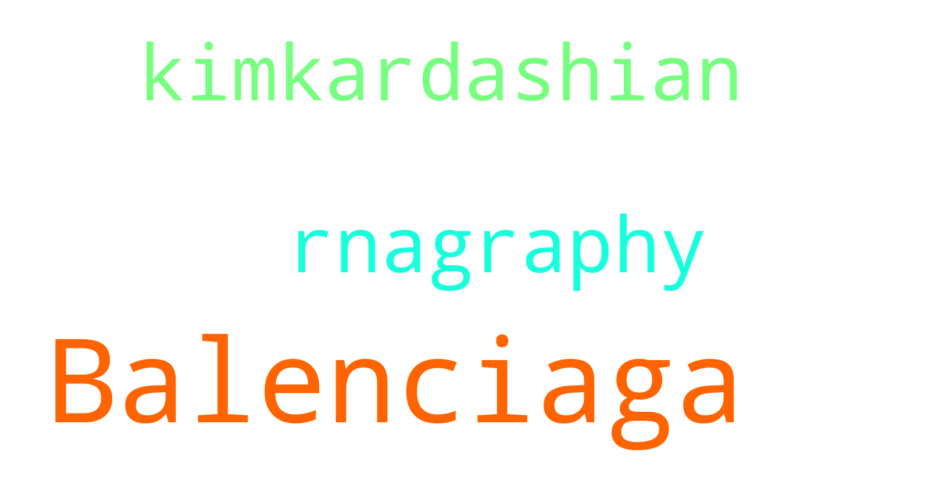

In [51]:
word_cloud(HT_positive)

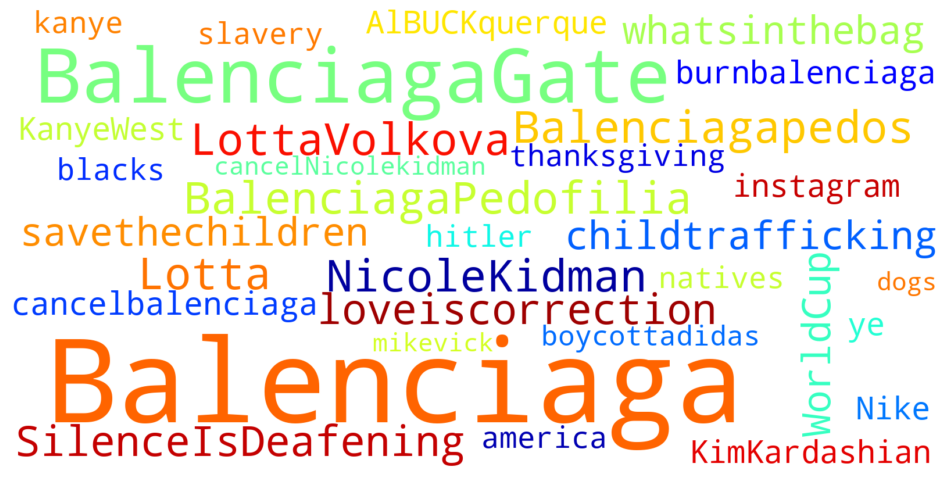

In [54]:
word_cloud(HT_negative)

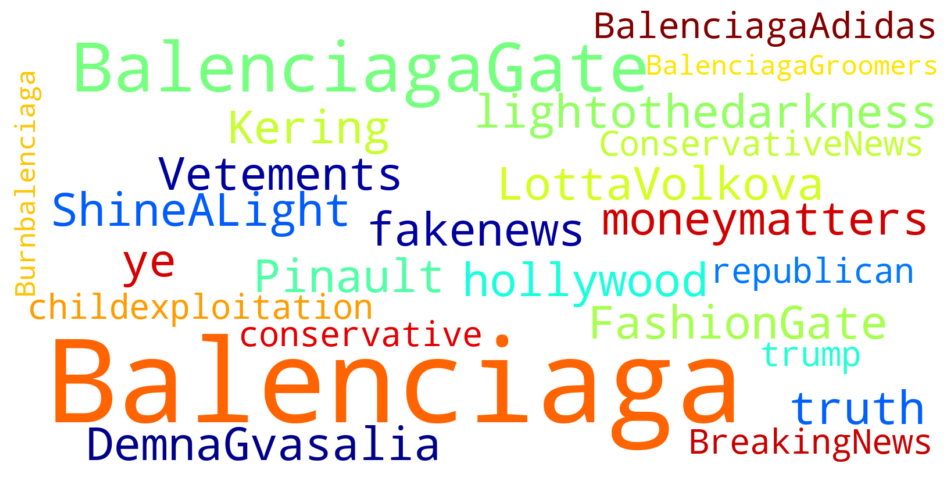

In [55]:
word_cloud(HT_neutral)